# Exploratory analysis

Now that we have a cleaned dataset, we can start to analyse the  attributes that we will use to make predictions

In [1]:
#Importing essential libraries
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Retrieving the cleaned dataset
url = 'https://raw.githubusercontent.com/aneezJaheez/Predicting-Aviation-Accidents-and-Injuries/main/Data/cleaned_aviation_dataset_final.csv'
aviationData = pd.read_csv(url,encoding = "ISO-8859-1")

In [3]:
aviationData = aviationData.drop("Unnamed: 0", axis = 1)

# Uni-variate Exploratory analysis

### Categorical Data Analysis

In [4]:
#Converting number of engines to categorical
aviationData['Number.of.Engines'] = aviationData['Number.of.Engines'].astype('object')

In [5]:
aviationCatData = pd.DataFrame(aviationData[['Injury.Severity', 'Aircraft.Damage', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.Flight', 'Weather.Condition', 'Broad.Phase.of.Flight', ]])

In [6]:
aviationCatData.columns = ['InjurySeverity', 'AircraftDamage', 'EngineCount', 'EngineType', 'FlightPurpose', 'Weather', 'Phase']

In [7]:
aviationCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   InjurySeverity  12954 non-null  object
 1   AircraftDamage  12954 non-null  object
 2   EngineCount     12954 non-null  object
 3   EngineType      12954 non-null  object
 4   FlightPurpose   12954 non-null  object
 5   Weather         12954 non-null  object
 6   Phase           12954 non-null  object
dtypes: object(7)
memory usage: 708.5+ KB


In [8]:
aviationCatData.shape

(12954, 7)

In [9]:
aviationCatData.head()

,InjurySeverity,AircraftDamage,EngineCount,EngineType,FlightPurpose,Weather,Phase
0,INCIDENT,MINOR,3,TURBO FAN,UNKNOWN,VMC,STANDING
1,INCIDENT,MINOR,4,TURBO FAN,UNKNOWN,VMC,TAXI
2,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,VMC,STANDING
3,NON-FATAL,MINOR,2,TURBO FAN,UNKNOWN,VMC,TAXI
4,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,VMC,STANDING


#### Injury Severity

In [10]:
pd.DataFrame(aviationCatData.InjurySeverity.value_counts())

,InjurySeverity
NON-FATAL,10341
FATAL,2177
INCIDENT,436


Text(0.5, 1.0, 'Injury Severity')

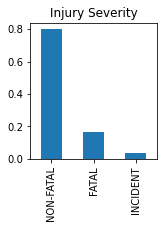

In [11]:
plt.figure(figsize = (5, 2.5))
plt.subplot(1, 2, 1);aviationCatData.InjurySeverity.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Injury Severity')

#### Aircraft Damage

In [12]:
pd.DataFrame(aviationCatData.AircraftDamage.value_counts())

,AircraftDamage
SUBSTANTIAL,10837
DESTROYED,1680
MINOR,437


Text(0.5, 1.0, 'Aircraft Damage')

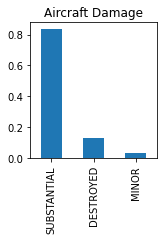

In [13]:
plt.figure(figsize = (5, 2.5))
plt.subplot(1, 2, 1);aviationCatData.AircraftDamage.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Aircraft Damage')

#### Number of Engines

In [14]:
pd.DataFrame(aviationCatData.EngineCount.value_counts())

,EngineCount
1,10371
2,2016
4,527
3,40


Text(0.5, 1.0, 'Number of Engines')

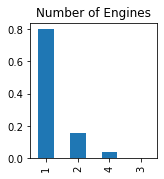

In [15]:
plt.figure(figsize = (5, 2.5))
plt.subplot(1, 2, 1);aviationCatData.EngineCount.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Number of Engines')

#### Engine Type

In [16]:
pd.DataFrame(aviationCatData.EngineType.value_counts())

,EngineType
RECIPROCATING,11286
TURBO PROP,599
TURBO FAN,547
UNKNOWN,406
TURBO JET,116


Text(0.5, 1.0, 'Engine Type')

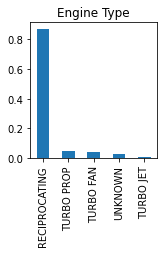

In [17]:
plt.figure(figsize = (5, 2.5))
plt.subplot(1, 2, 1);aviationCatData.EngineType.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Engine Type')

#### Purpose of Flight

In [18]:
pd.DataFrame(aviationCatData.FlightPurpose.value_counts())

,FlightPurpose
PERSONAL,9985
UNKNOWN,1568
BUSINESS,629
POSITIONING,248
FERRY,137
EXECUTIVE/CORPORATE,110
PUBLIC AIRCRAFT,100
OTHER WORK USE,91
FLIGHT TEST,86


Text(0.5, 1.0, 'Purpose of Flight')

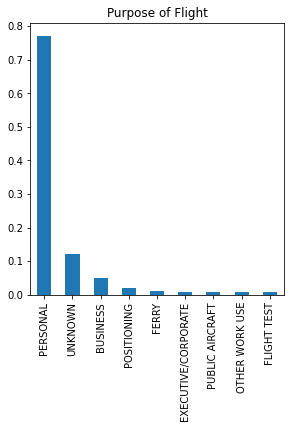

In [19]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1);aviationCatData.FlightPurpose.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Purpose of Flight')

#### Weather Condition

In [20]:
pd.DataFrame(aviationCatData.Weather.value_counts())

,Weather
VMC,12026
IMC,928


Text(0.5, 1.0, 'Weather Condition')

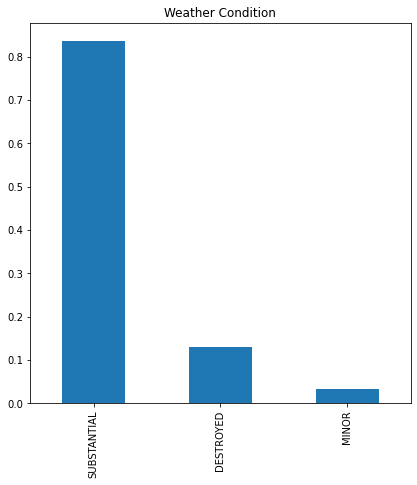

In [21]:
plt.figure(figsize = (15, 7))
plt.subplot(1, 2, 1)
aviationCatData.AircraftDamage.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Weather Condition')

#### Phase of Flight

In [22]:
pd.DataFrame(aviationCatData.Phase.value_counts())

,Phase
LANDING,4755
TAKEOFF,2940
APPROACH,1404
CRUISE,1139
MANEUVERING,859
TAXI,545
DESCENT,421
CLIMB,334
GO-AROUND,303
STANDING,254


Text(0.5, 1.0, 'Phase of Flight')

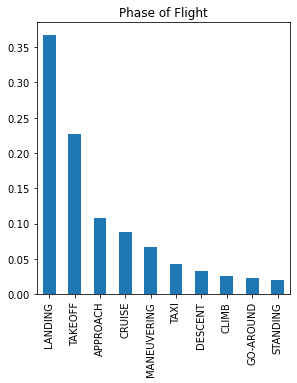

In [23]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1);aviationCatData.Phase.value_counts(normalize = True).plot(kind = 'bar'); plt.title('Phase of Flight')

In [24]:
compare = aviationCatData.groupby("AircraftDamage").InjurySeverity.value_counts(normalize = True)
compare.unstack()

InjurySeverity,FATAL,INCIDENT,NON-FATAL
AircraftDamage,,,
DESTROYED,0.698214,0.027381,0.274405
MINOR,0.038902,0.672769,0.288330
SUBSTANTIAL,0.091077,0.008859,0.900065


Text(0.5, 1.0, 'Injury severity at each level of aircraft damage')

<Figure size 1440x720 with 0 Axes>

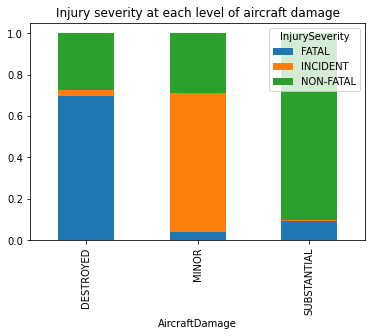

In [25]:
plt.figure(figsize = (20, 10))
compare.unstack().plot(kind='bar', stacked = True); plt.title('Injury severity at each level of aircraft damage')

In [26]:
compare = aviationCatData.groupby("Phase").InjurySeverity.value_counts(normalize = True)
compare.unstack()

InjurySeverity,FATAL,INCIDENT,NON-FATAL
Phase,,,
APPROACH,0.277778,0.038462,0.683761
CLIMB,0.323353,0.098802,0.577844
CRUISE,0.324846,0.040386,0.634767
DESCENT,0.270784,0.042755,0.686461
GO-AROUND,0.267327,0.026403,0.706271
LANDING,0.014932,0.025026,0.960042
MANEUVERING,0.566938,0.008149,0.424913
STANDING,0.074803,0.059055,0.866142
TAKEOFF,0.181633,0.034354,0.784014


Text(0.5, 1.0, 'Injury severity at different phases')

<Figure size 1440x720 with 0 Axes>

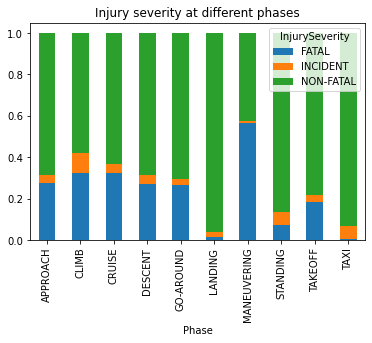

In [27]:
plt.figure(figsize = (20, 10))
compare.unstack().plot(kind='bar', stacked = True); plt.title('Injury severity at different phases')

In [28]:
compare = aviationCatData.groupby("Weather").AircraftDamage.value_counts(normalize = True)
compare.unstack()

AircraftDamage,DESTROYED,MINOR,SUBSTANTIAL
Weather,,,
IMC,0.411638,0.034483,0.553879
VMC,0.107933,0.033677,0.858390


Text(0.5, 1.0, 'Aircraft Damage at each weather condition')

<Figure size 1080x720 with 0 Axes>

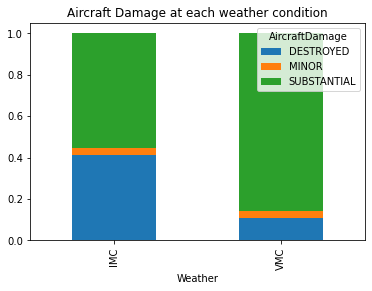

In [29]:
plt.figure(figsize = (15, 10))
compare.unstack().plot(kind='bar', stacked = True); plt.title('Aircraft Damage at each weather condition')

In [30]:
compare = aviationCatData.groupby("Phase").AircraftDamage.value_counts(normalize = True)
compare.unstack()

AircraftDamage,DESTROYED,MINOR,SUBSTANTIAL
Phase,,,
APPROACH,0.170940,0.027066,0.801994
CLIMB,0.269461,0.053892,0.676647
CRUISE,0.320457,0.028095,0.651449
DESCENT,0.182898,0.028504,0.788599
GO-AROUND,0.181518,0.029703,0.788779
LANDING,0.029863,0.020820,0.949317
MANEUVERING,0.327125,0.011641,0.661234
STANDING,0.043307,0.251969,0.704724
TAKEOFF,0.140476,0.020748,0.838776


Text(0.5, 1.0, 'Aircraft Damage at each phase')

<Figure size 1440x720 with 0 Axes>

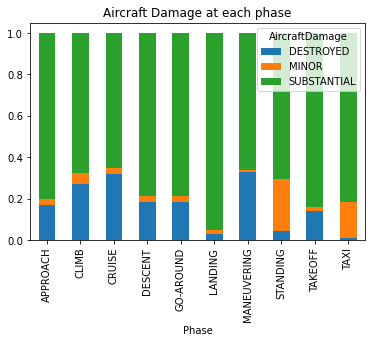

In [31]:
plt.figure(figsize = (20, 10))
compare.unstack().plot(kind='bar', stacked = True); plt.title('Aircraft Damage at each phase')

Text(0.5, 1.0, 'Injury severity at different phases')

<Figure size 1440x720 with 0 Axes>

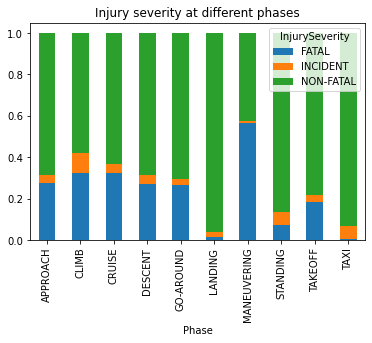

In [32]:
compare = aviationCatData.groupby("Phase").InjurySeverity.value_counts(normalize = True)
compare.unstack()
plt.figure(figsize = (20, 10))
compare.unstack().plot(kind='bar', stacked = True); plt.title('Injury severity at different phases')

In [33]:
aviationCatData

,InjurySeverity,AircraftDamage,EngineCount,EngineType,FlightPurpose,Weather,Phase
0,INCIDENT,MINOR,3,TURBO FAN,UNKNOWN,VMC,STANDING
1,INCIDENT,MINOR,4,TURBO FAN,UNKNOWN,VMC,TAXI
2,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,VMC,STANDING
3,NON-FATAL,MINOR,2,TURBO FAN,UNKNOWN,VMC,TAXI
4,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,VMC,STANDING
...,...,...,...,...,...,...,...
12949,NON-FATAL,DESTROYED,1,RECIPROCATING,PERSONAL,VMC,LANDING
12950,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,BUSINESS,VMC,TAXI
12951,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,UNKNOWN,VMC,LANDING
12952,NON-FATAL,SUBSTANTIAL,2,RECIPROCATING,UNKNOWN,VMC,TAKEOFF


### Numerical Data analysis

In [34]:
aviationNumData = pd.DataFrame(aviationData[['Altitude', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Total.Passengers']])

/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Altitude'>

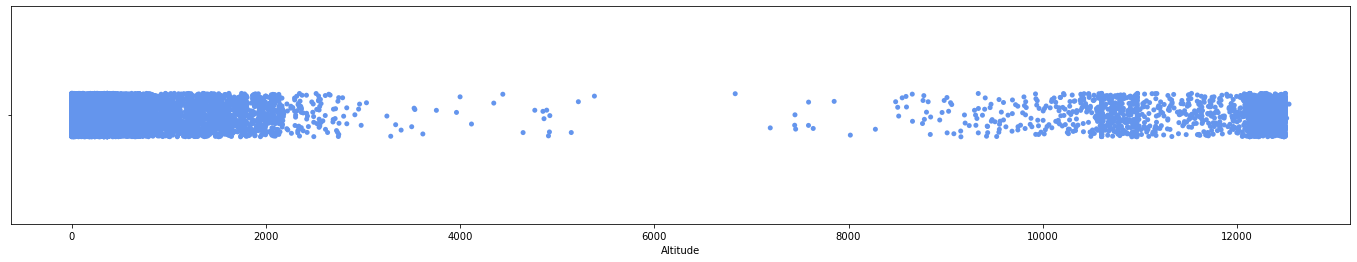

In [35]:
f, axes = plt.subplots(1, 1, figsize=(24, 4))
sb.stripplot(aviationNumData['Altitude'], orient = "h", color = "cornflowerblue")

In [36]:
aviationNumData.describe()

,Altitude,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total.Passengers
count,12954.000000,12954.000000,12954.000000,12954.000000,12954.000000,12954.000000
mean,2449.158847,0.414775,0.173614,0.309788,5.720241,6.618419
std,4303.358552,3.409520,0.765511,1.835256,29.584821,30.029360
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,195.200000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,367.200000,0.000000,0.000000,0.000000,1.000000,2.000000
75%,1341.200000,0.000000,0.000000,0.000000,2.000000,3.000000
max,12534.600000,228.000000,50.000000,137.000000,588.000000,588.000000


In [37]:
aviationNumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12954 entries, 0 to 12953
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Altitude                12954 non-null  float64
 1   Total.Fatal.Injuries    12954 non-null  int64  
 2   Total.Serious.Injuries  12954 non-null  int64  
 3   Total.Minor.Injuries    12954 non-null  int64  
 4   Total.Uninjured         12954 non-null  int64  
 5   Total.Passengers        12954 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 607.3 KB


In [38]:
aviationNumData['Altitude'].describe()

count    12954.000000
mean      2449.158847
std       4303.358552
min          0.000000
25%        195.200000
50%        367.200000
75%       1341.200000
max      12534.600000
Name: Altitude, dtype: float64

/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/aneez.jaheez/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will 

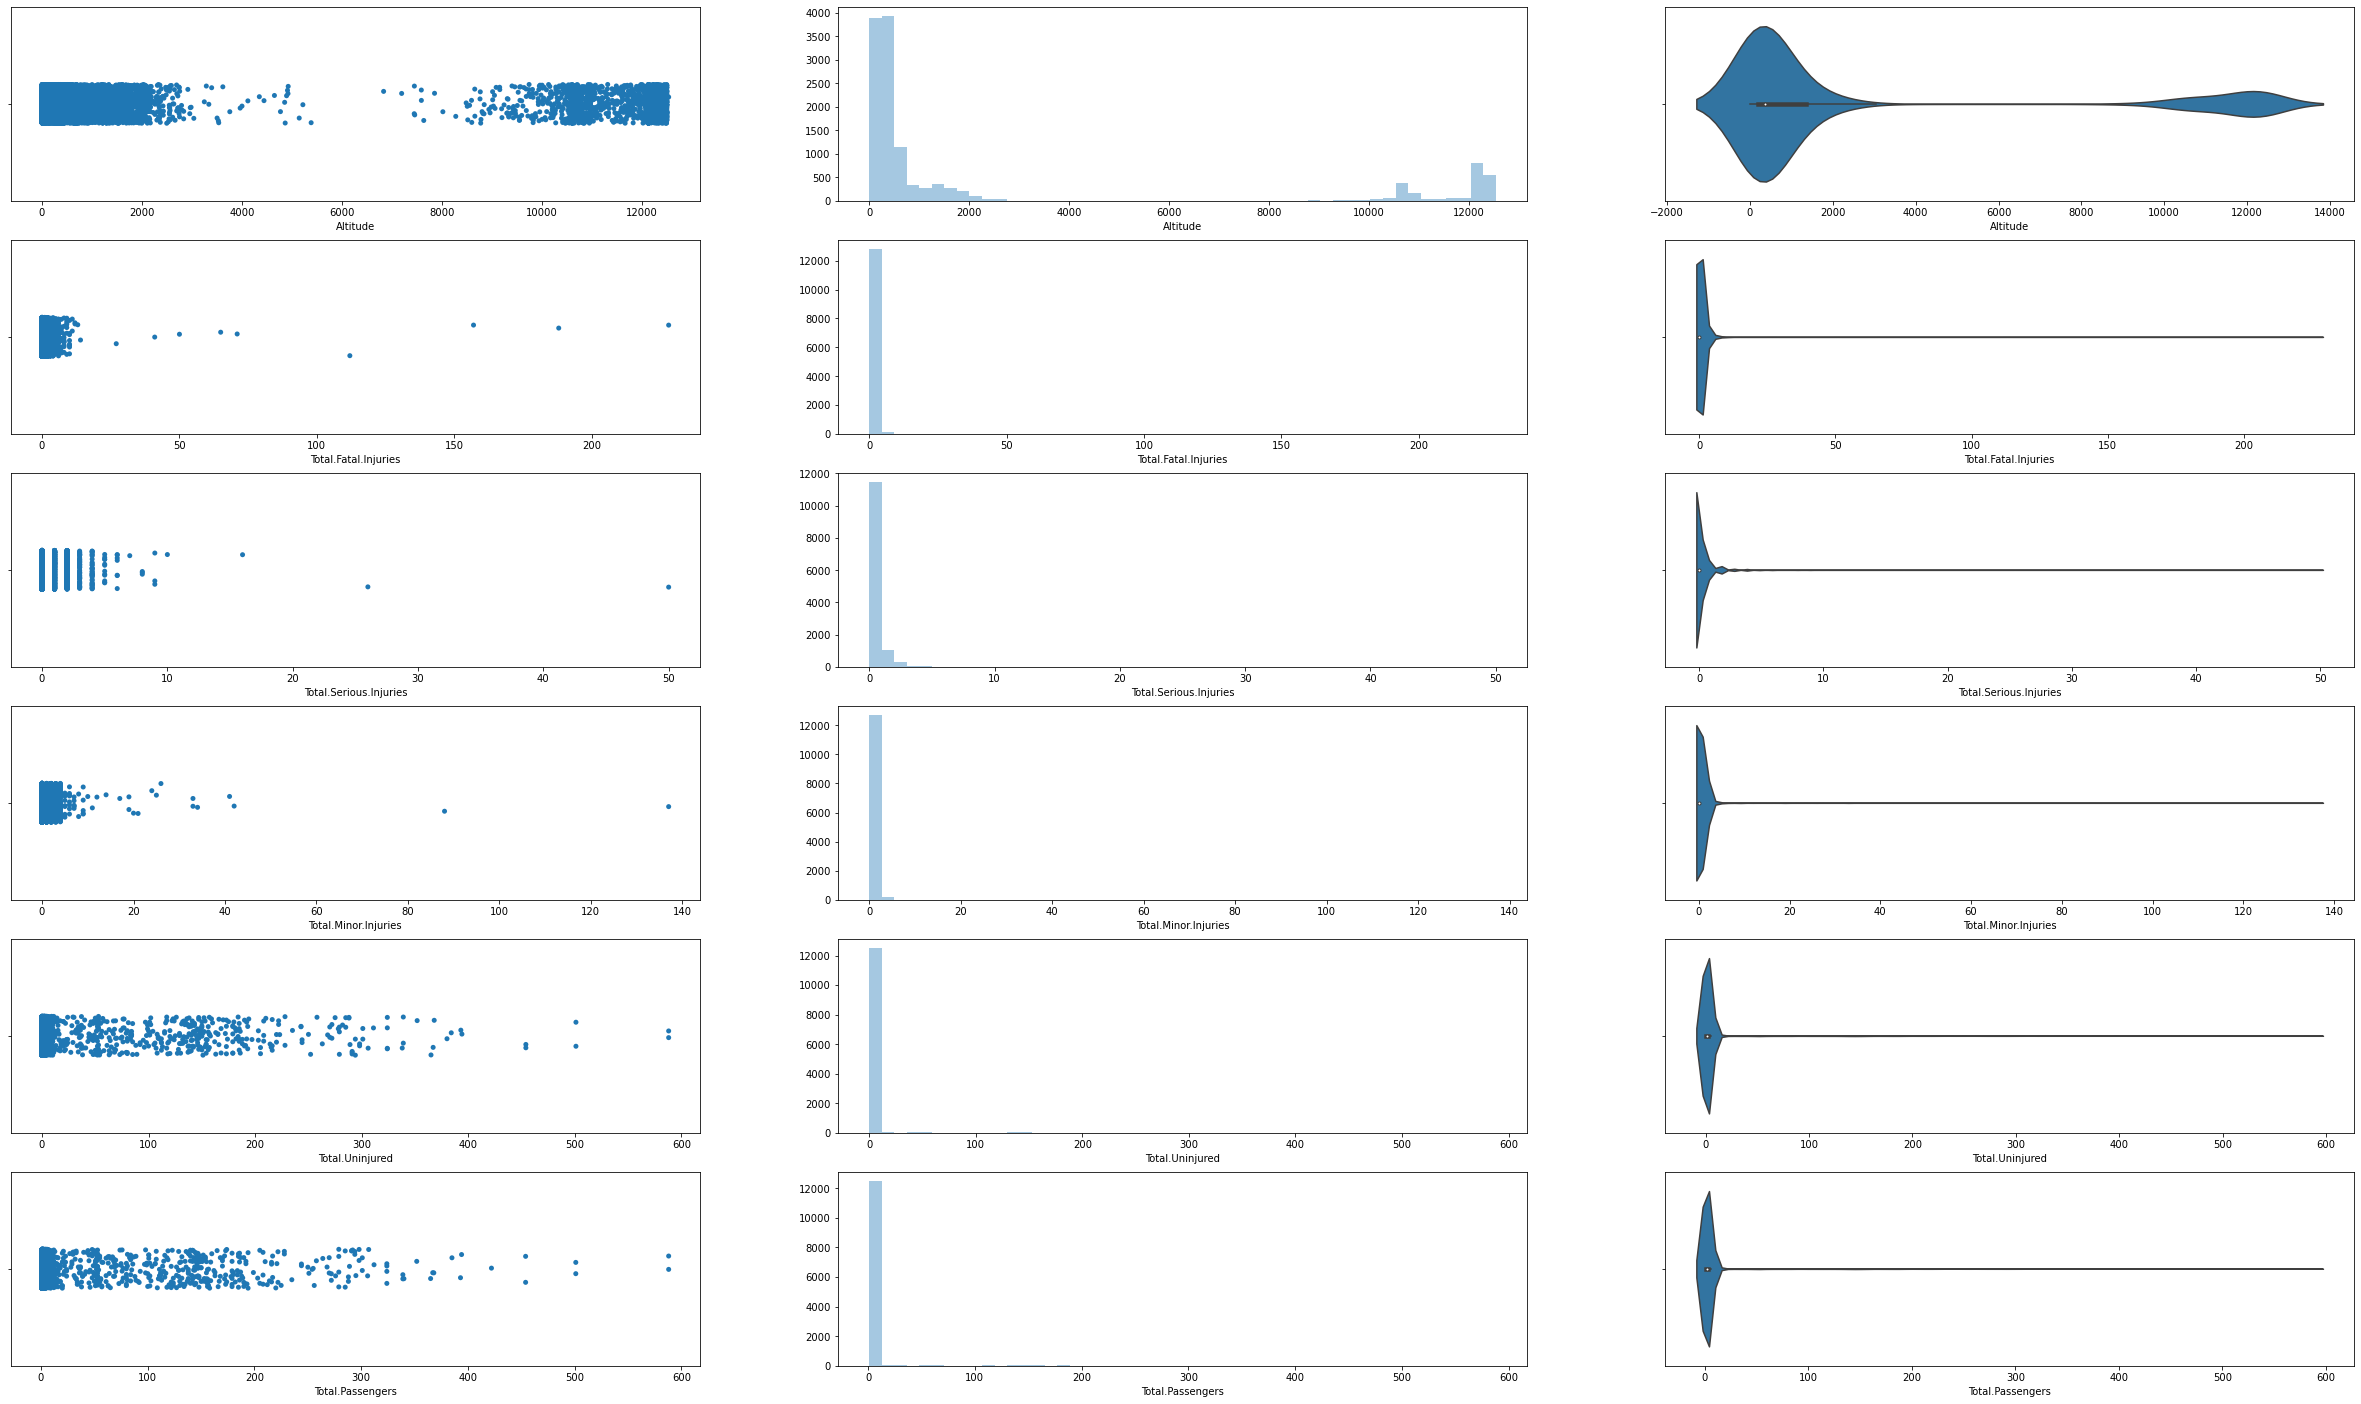

In [39]:
count = 0
f, axes = plt.subplots(6, 3, figsize=(42, 25))

for i in aviationNumData:
    sb.stripplot(aviationData[i], orient = "h", ax = axes[count,0])
    sb.distplot(aviationData[i], kde = False, ax = axes[count,1])
    sb.violinplot(aviationData[i], ax = axes[count,2])
    count += 1

                        Altitude  Total.Fatal.Injuries  \
Altitude                1.000000              0.059269   
Total.Fatal.Injuries    0.059269              1.000000   
Total.Serious.Injuries  0.036064              0.198422   
Total.Minor.Injuries    0.005459             -0.007162   
Total.Uninjured        -0.050748             -0.021292   
Total.Passengers       -0.042014              0.097184   

                        Total.Serious.Injuries  Total.Minor.Injuries  \
Altitude                              0.036064              0.005459   
Total.Fatal.Injuries                  0.198422             -0.007162   
Total.Serious.Injuries                1.000000              0.460017   
Total.Minor.Injuries                  0.460017              1.000000   
Total.Uninjured                       0.048355              0.099347   
Total.Passengers                      0.123774              0.169905   

                        Total.Uninjured  Total.Passengers  
Altitude                    

<AxesSubplot:>

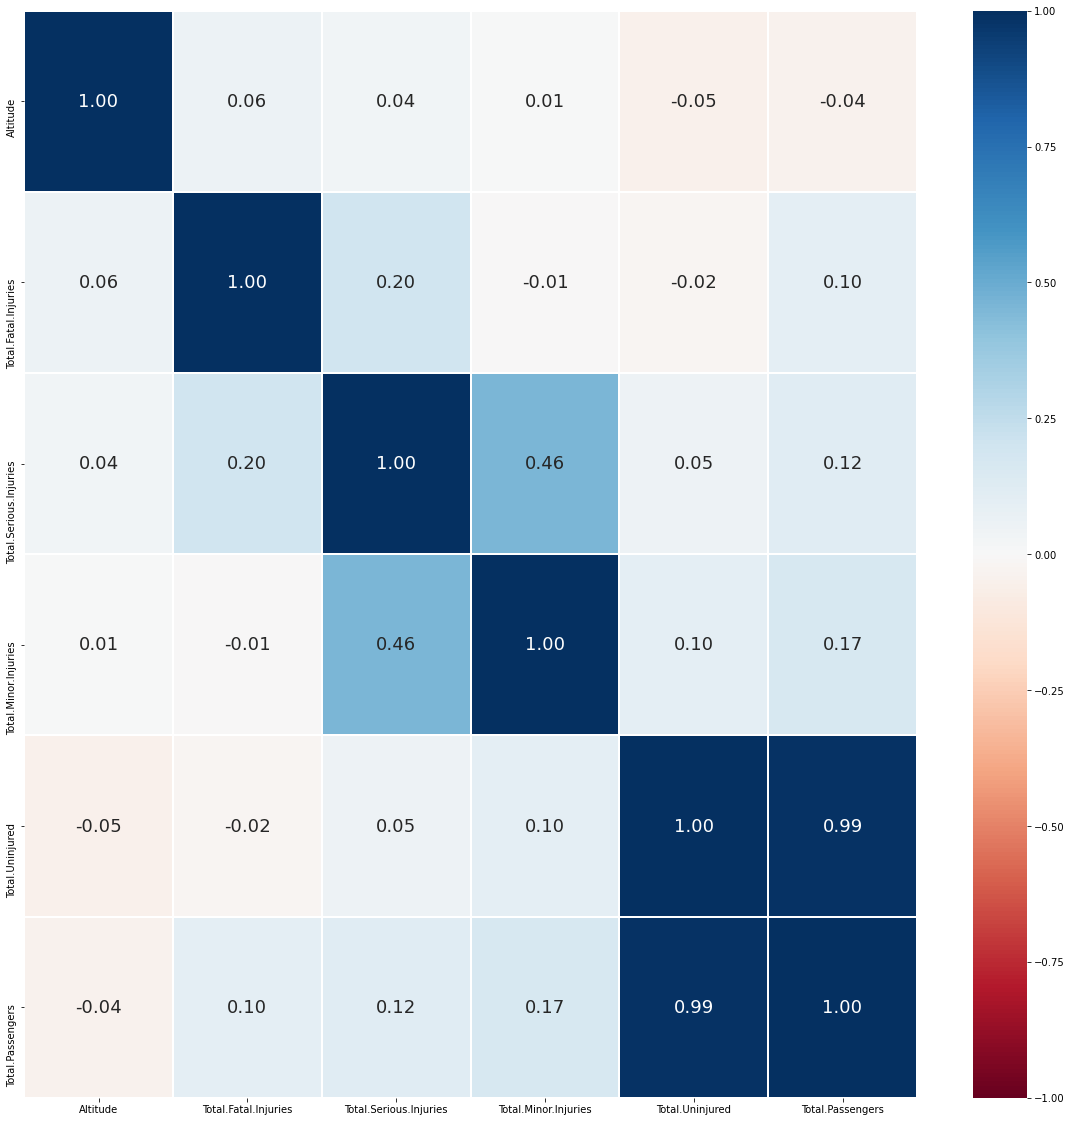

In [40]:
print(aviationNumData.corr())
f, axes = plt.subplots(1, 1, figsize=(20, 20))
sb.heatmap(aviationNumData.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

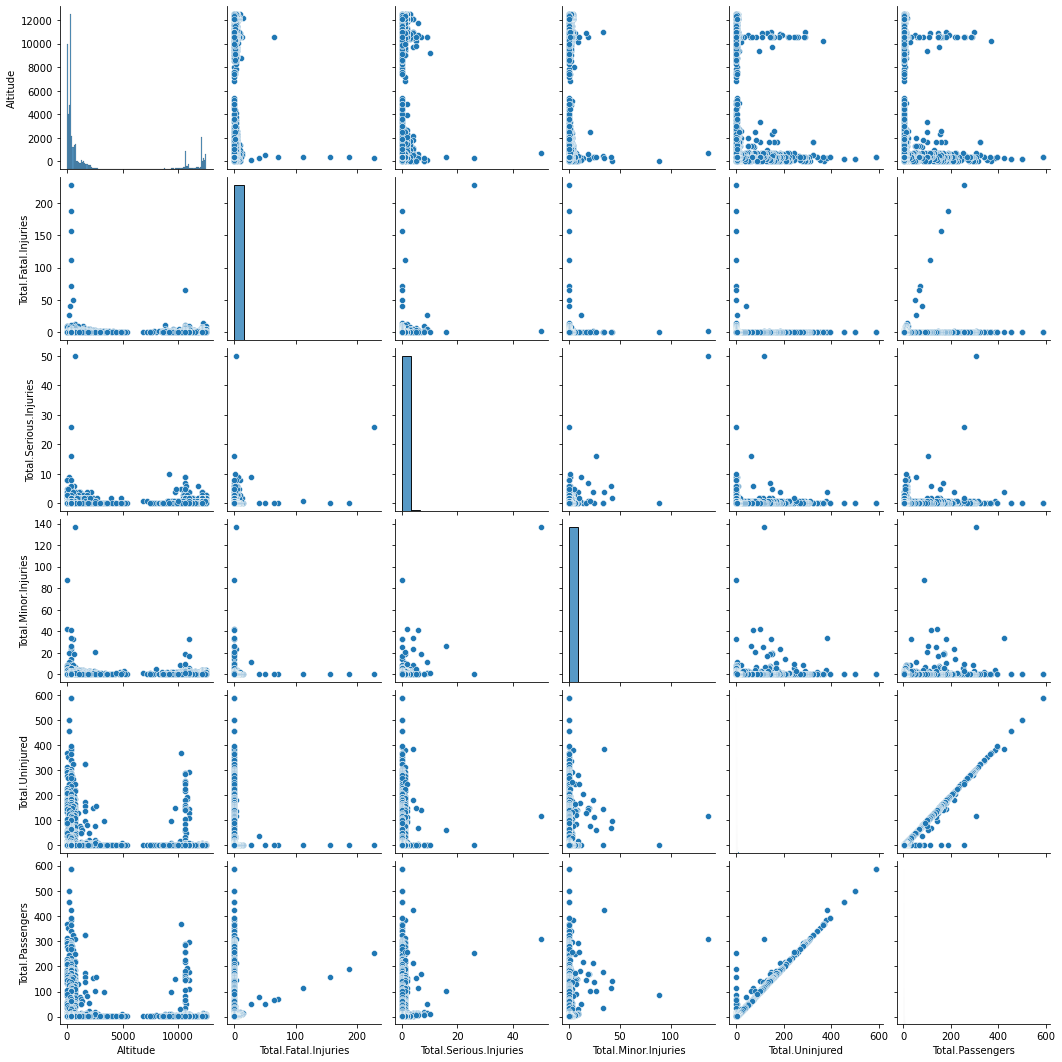

In [41]:
sb.pairplot(data = aviationNumData)

## Visualizing relationships between Numerical and Categorical Data

In [42]:
aviationData

,Altitude,Latitude,Longitude,Injury.Severity,Aircraft.Damage,Number.of.Engines,Engine.Type,Purpose.of.Flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Total.Passengers
0,367.2,39.164723,-96.610412,INCIDENT,MINOR,3,TURBO FAN,UNKNOWN,0,0,0,588,VMC,STANDING,588
1,367.2,39.164723,-96.610412,INCIDENT,MINOR,4,TURBO FAN,UNKNOWN,0,0,0,588,VMC,TAXI,588
2,202.7,41.968611,-87.907778,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,STANDING,501
3,202.7,41.968611,-87.907778,NON-FATAL,MINOR,2,TURBO FAN,UNKNOWN,0,0,0,501,VMC,TAXI,501
4,215.4,35.213611,-80.948889,NON-FATAL,SUBSTANTIAL,2,TURBO FAN,UNKNOWN,0,0,0,454,VMC,STANDING,454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12949,367.2,39.164723,-96.610412,NON-FATAL,DESTROYED,1,RECIPROCATING,PERSONAL,0,0,0,1,VMC,LANDING,1
12950,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,BUSINESS,0,0,0,1,VMC,TAXI,1
12951,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,1,RECIPROCATING,UNKNOWN,0,0,0,1,VMC,LANDING,1
12952,367.2,39.164723,-96.610412,NON-FATAL,SUBSTANTIAL,2,RECIPROCATING,UNKNOWN,0,0,1,0,VMC,TAKEOFF,1


<AxesSubplot:xlabel='Injury.Severity', ylabel='Altitude'>

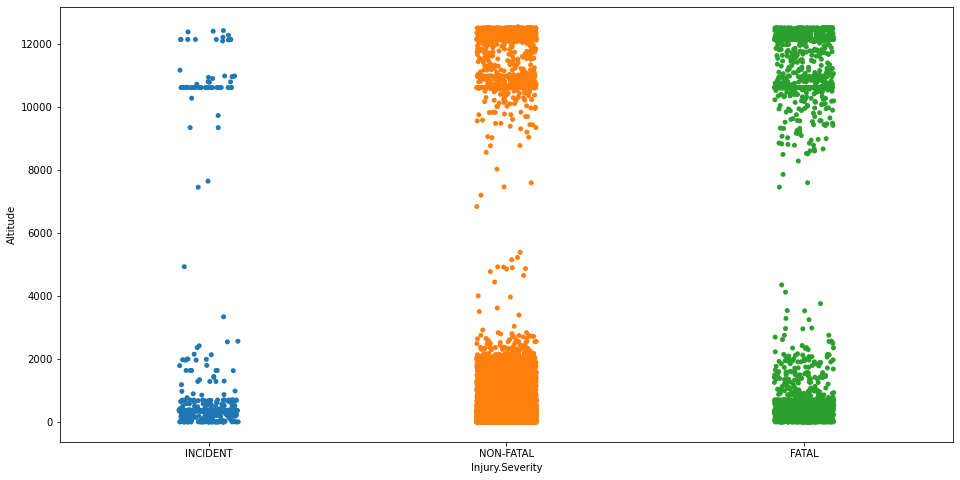

In [43]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.stripplot(x = 'Injury.Severity', y = 'Altitude', data = aviationData)

<AxesSubplot:xlabel='Purpose.of.Flight', ylabel='Total.Passengers'>

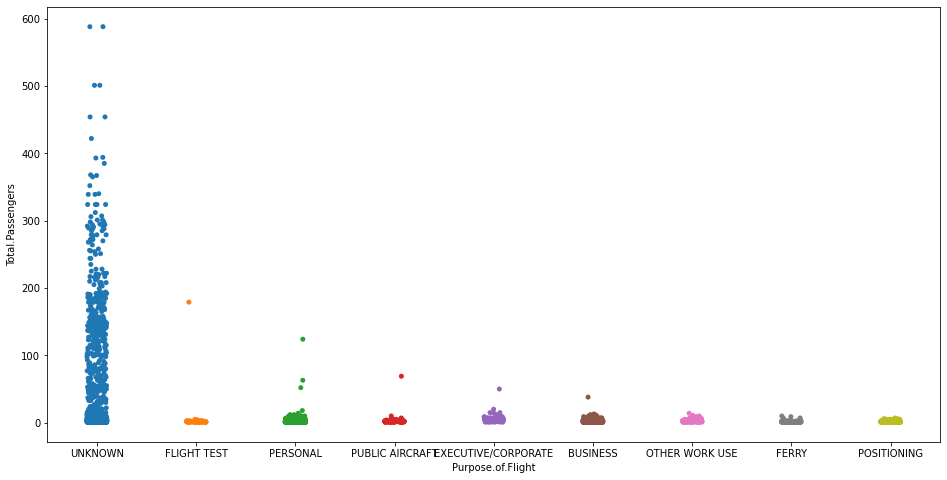

In [44]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.stripplot(x = 'Purpose.of.Flight', y = 'Total.Passengers', data = aviationData)

<AxesSubplot:xlabel='Aircraft.Damage', ylabel='Altitude'>

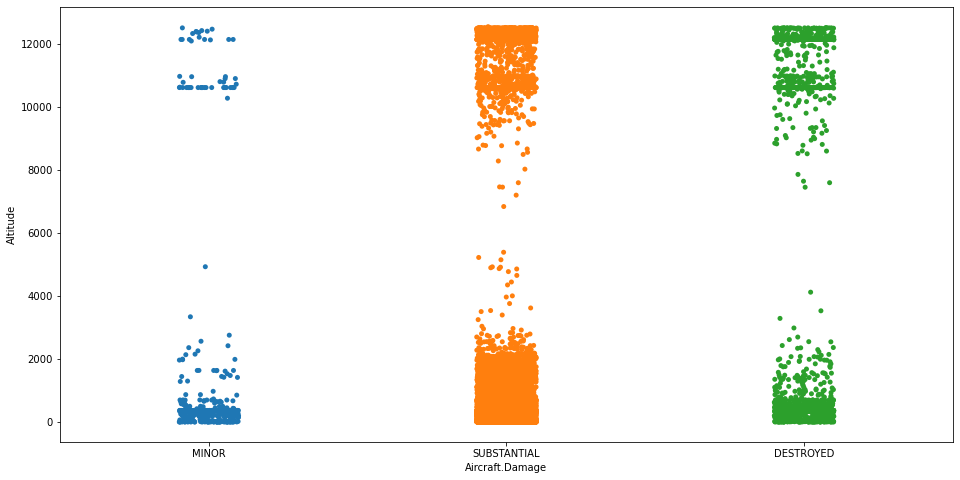

In [45]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.stripplot(x = 'Aircraft.Damage', y = 'Altitude', data = aviationData)

<AxesSubplot:xlabel='Weather.Condition', ylabel='Total.Fatal.Injuries'>

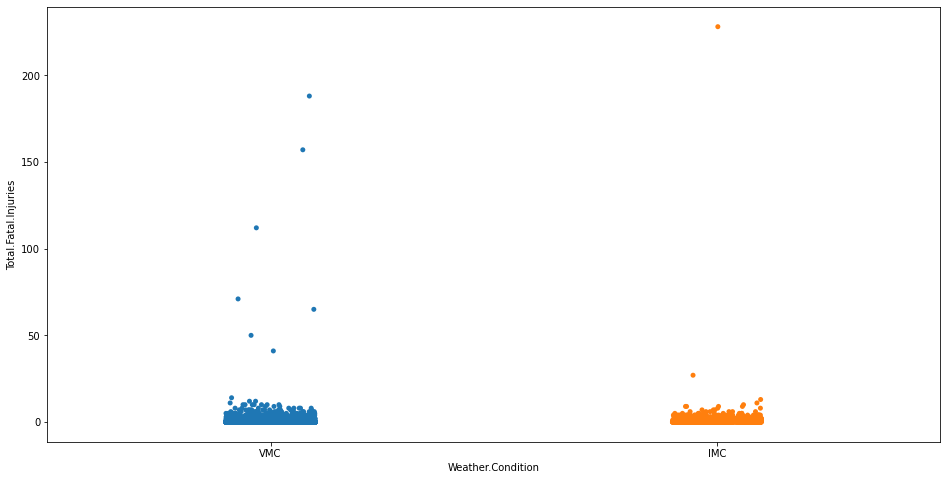

In [46]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.stripplot(x = 'Weather.Condition', y = 'Total.Fatal.Injuries', data = aviationData)

Using the information obtained from the exploratory analysis, we can begin to make predictions.